In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 4 ##
In this problem you will simulate a variation of the standard random walk pattern in Python and compare the result of the simulation to the prediction given by the central limit theorem.

### a) ###

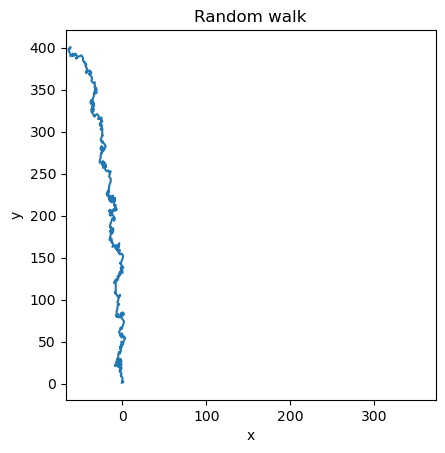

In [14]:
x = 0
y = 0

p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n = 500

x_arr = np.array([])
y_arr = np.array([])

for i in range(n):
    x_rand = np.random.rand()
    y_rand = np.random.rand()

    if x_rand <= p_1x:
        x = 0
    elif x_rand <= p_1x + p_2x:
        x = -2
    else:
        x = 1

    if y_rand <= p_1y:
        y = 3
    else:
        y = -1

    x_arr = np.append(x_arr, x)
    y_arr = np.append(y_arr, y)

x_walk = np.cumsum(x_arr)
y_walk = np.cumsum(y_arr)

plt.plot(x_walk, y_walk)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random walk') 
plt.axis('square')
plt.show()

### b) ###

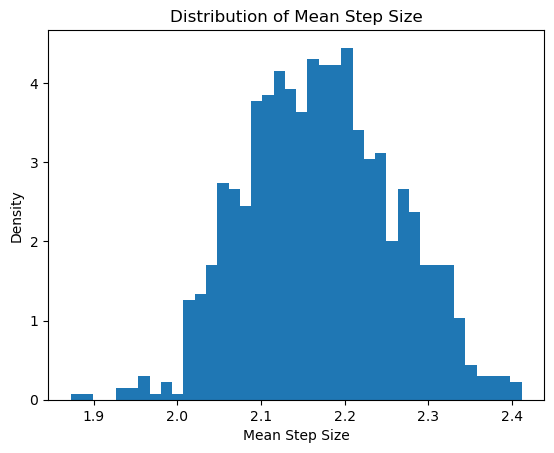

Mean: 2.1718795103602724 Variance: 0.007933209692940401


In [15]:
p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n_simulations = 1000
steps_per_walk = 100

s_space = np.linspace(1.5, 2.8, 1000)

mds_arr = np.array([])

for _ in range(n_simulations):
    ds_arr = np.array([])
    for _ in range(steps_per_walk):
        x_rand = np.random.rand()
        if x_rand <= p_1x:
            dx = 0
        elif x_rand <= p_1x + p_2x:
            dx = -2
        else:
            dx = 1
        
        y_rand = np.random.rand()
        if y_rand <= p_1y:
            dy = 3
        else:
            dy = -1
        
        ds = np.sqrt(dx**2 + dy**2)
        ds_arr = np.append(ds_arr, ds)
    
    mds_arr = np.append(mds_arr, np.mean(ds_arr))

plt.hist(mds_arr, bins=40, density=True)
plt.xlabel('Mean Step Size')
plt.ylabel('Density')
plt.title('Distribution of Mean Step Size')
plt.show()

print('Mean:', np.mean(mds_arr), 'Variance:', np.var(mds_arr))

### c) ###

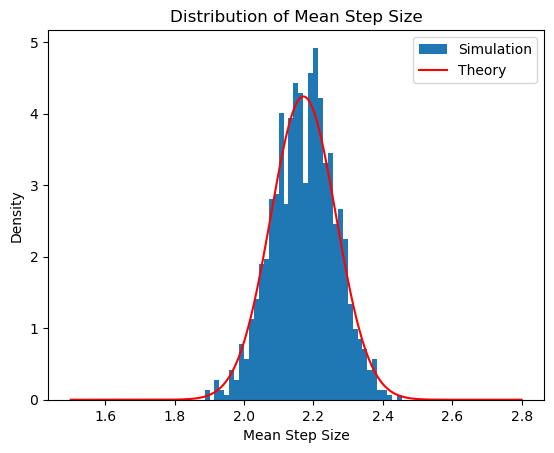

In [16]:
p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n_simulations = 1000
steps_per_walk = 100

mu_s = 2.171
var_s = 0.8853
sigma_mean = np.sqrt(var_s / steps_per_walk)

def density(s):
    return 1 / (sigma_mean * np.sqrt(2 * np.pi)) * np.exp(-(s - mu_s)**2 / (2 * sigma_mean**2))

s_space = np.linspace(1.5, 2.8, 1000)

mds_arr = np.array([])

for _ in range(n_simulations):
    ds_arr = np.array([])
    for _ in range(steps_per_walk):
        # Generate Δx
        x_rand = np.random.rand()
        if x_rand <= p_1x:
            dx = 0
        elif x_rand <= p_1x + p_2x:
            dx = -2
        else:
            dx = 1
        
        y_rand = np.random.rand()
        if y_rand <= p_1y:
            dy = 3
        else:
            dy = -1
        
        ds = np.sqrt(dx**2 + dy**2)
        ds_arr = np.append(ds_arr, ds)
    
    mds_arr = np.append(mds_arr, np.mean(ds_arr))

plt.hist(mds_arr, bins=40, density=True, label='Simulation')
plt.plot(s_space, density(s_space), 'r', label='Theory')
plt.xlabel('Mean Step Size')
plt.ylabel('Density')
plt.title('Distribution of Mean Step Size')
plt.legend()
plt.show()